# importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats

# Read the Datasheet

In [2]:
data=pd.read_csv('D:\ilp.csv')

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Handling missing values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio    False
Dataset                       False
dtype: bool

In [6]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data['Gender']=lc.fit_transform(data['Gender'])

# Data Analysis

## Descriptive Statistical

In [8]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.945197,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.320164,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


## Univariate Analysis

C:\Users\SK VETRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


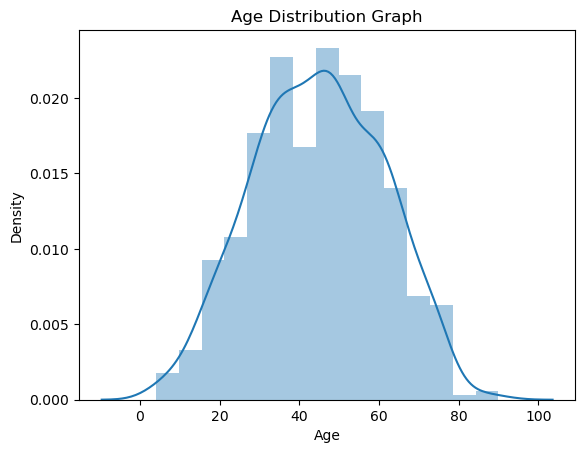

In [9]:
sns.distplot(data['Age'])
plt.title('Age Distribution Graph')
plt.show()

## Bivariate Analysis

C:\Users\SK VETRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dataset', ylabel='count'>

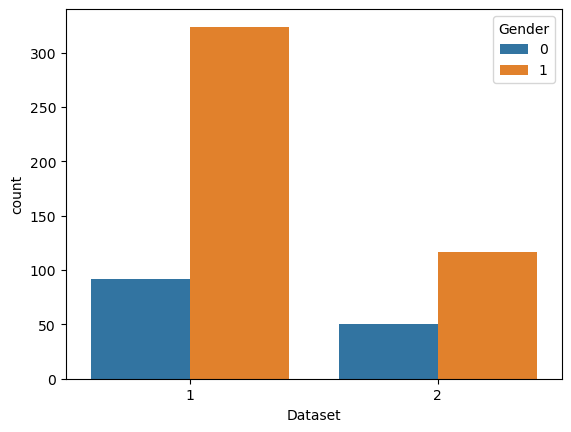

In [10]:
sns.countplot(data['Dataset'], hue=data['Gender'])

## Multivarient Analysis

<AxesSubplot:>

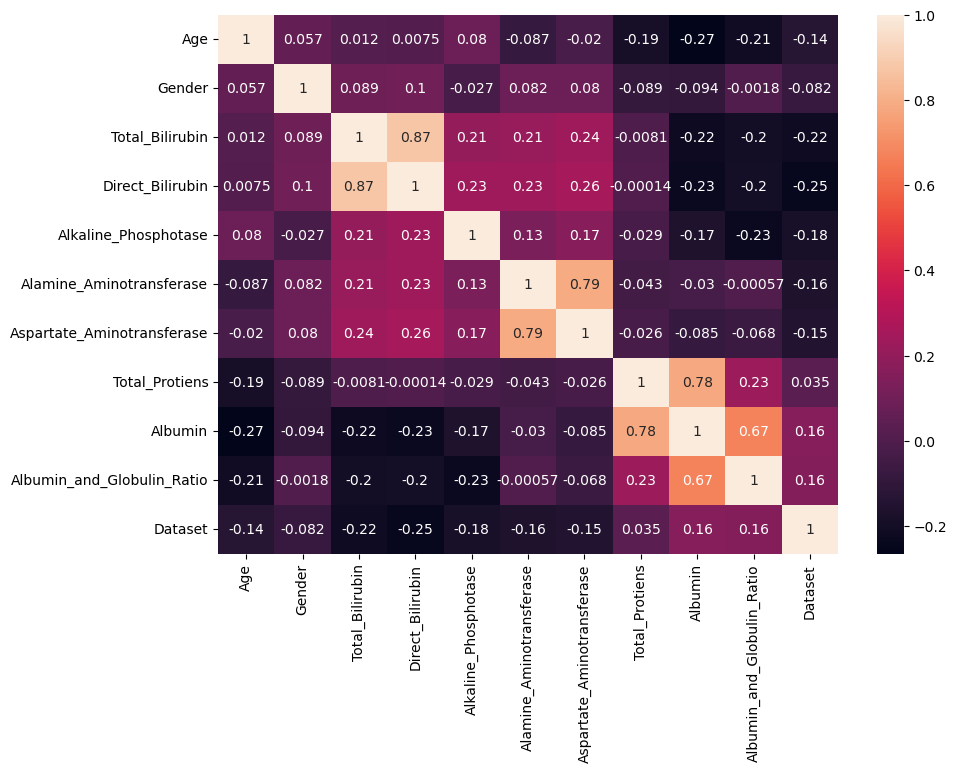

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

In [12]:
from sklearn.preprocessing import scale
X=data.iloc[:,:-1]

X_scaled=pd.DataFrame (scale(X),columns=X.columns)

In [13]:
X_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,-1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.141290
1,1.066637,0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.641463
2,1.066637,0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.172551
3,0.819356,0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.171318
4,1.684839,0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.704330


In [14]:
x=data.iloc[:,:-1]
y=data.Dataset

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y, test_size=0.2, random_state=42)

# Handling Imbalance Data

In [16]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [17]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [18]:
y_train.value_counts()

1    329
2    137
Name: Dataset, dtype: int64

In [19]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [20]:
y_train_smote.value_counts()

1    329
2    329
Name: Dataset, dtype: int64

# Model Building

## Random Forest Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
model1=RandomForestClassifier()
model1.fit(x_train_smote, y_train_smote)
y_predict=model1.predict(x_test)
rfc1=accuracy_score(y_test,y_predict)
rfc1
pd.crosstab(y_test, y_predict)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.84      0.77      0.80        87
           2       0.46      0.57      0.51        30

    accuracy                           0.72       117
   macro avg       0.65      0.67      0.65       117
weighted avg       0.74      0.72      0.73       117



## Decision tree model

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
model4=DecisionTreeClassifier()
model4.fit(x_train_smote, y_train_smote)
y_predict=model4.predict(x_test)
dtc1=accuracy_score(y_test,y_predict)
dtc1
pd.crosstab(y_test, y_predict)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.82      0.74      0.78        87
           2       0.41      0.53      0.46        30

    accuracy                           0.68       117
   macro avg       0.62      0.63      0.62       117
weighted avg       0.72      0.68      0.70       117



## knn model

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
model2=KNeighborsClassifier()
model2.fit(x_train_smote, y_train_smote)
y_predict=model2.predict(x_test)
knn1=accuracy_score(y_test,y_predict)
knn1
pd.crosstab(y_test, y_predict)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.81      0.53      0.64        87
           2       0.32      0.63      0.42        30

    accuracy                           0.56       117
   macro avg       0.56      0.58      0.53       117
weighted avg       0.68      0.56      0.58       117



C:\Users\SK VETRI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Logistic Regession Model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
model5=LogisticRegression()
model5.fit(x_train_smote, y_train_smote)
y_predict=model5.predict(x_test)
logi1=accuracy_score(y_test,y_predict)
logi1
pd.crosstab(y_test, y_predict)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.96      0.53      0.68        87
           2       0.41      0.93      0.57        30

    accuracy                           0.63       117
   macro avg       0.68      0.73      0.62       117
weighted avg       0.82      0.63      0.65       117



In [25]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
classifier = Sequential()

In [27]:
classifier.add(Dense(units=100, activation='relu',input_dim=10))

In [28]:
classifier.add(Dense(units=50, activation='relu'))

In [29]:
classifier.add(Dense(units=1, activation='sigmoid'))

In [30]:
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
model_history = classifier.fit(x, y,batch_size=100,validation_split=0.2, epochs=100)

Epoch 1/100
5/5 [==============================] - 5s 184ms/step - loss: -3.9747 - accuracy: 0.6502 - val_loss: -9.0835 - val_accuracy: 0.7350
Epoch 2/100
5/5 [==============================] - 0s 23ms/step - loss: -14.0732 - accuracy: 0.7082 - val_loss: -18.0461 - val_accuracy: 0.7350
Epoch 3/100
5/5 [==============================] - 0s 20ms/step - loss: -24.6616 - accuracy: 0.7082 - val_loss: -27.6947 - val_accuracy: 0.7350
Epoch 4/100
5/5 [==============================] - 0s 27ms/step - loss: -36.7002 - accuracy: 0.7082 - val_loss: -38.1598 - val_accuracy: 0.7350
Epoch 5/100
5/5 [==============================] - 0s 27ms/step - loss: -49.7300 - accuracy: 0.7082 - val_loss: -49.8942 - val_accuracy: 0.7350
Epoch 6/100
5/5 [==============================] - 0s 27ms/step - loss: -63.7927 - accuracy: 0.7082 - val_loss: -63.3684 - val_accuracy: 0.7350
Epoch 7/100
5/5 [==============================] - 0s 43ms/step - loss: -80.8239 - accuracy: 0.7082 - val_loss: -78.2642 - val_accuracy: 

# testing the model

In [32]:
model4.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

C:\Users\SK VETRI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [33]:

model1.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])



C:\Users\SK VETRI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [34]:
import numpy as np
from sklearn.preprocessing import scale
def predict_exit(sample_value):
    sample_value=np.array(sample_value)
    sample_value=sample_value.reshape(1,-1)
    sample_value=scale(sample_value)
    return classifier.predict(sample_value)

In [35]:
sample_value=[[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]]
if predict_exit(sample_value)>0.5:
    print('prediction: Liver Patient')
else:
        print('prediction: Healthy')

1/1 [==============================] - 0s 234ms/step
prediction: Liver Patient


# compare the model

In [36]:
acc_smote= [['KNN Classifier',knn1],['RandomForestClassifier',rfc1],['DecisionTreeClassifier',dtc1],['LogisticRegression',logi1]]
Liverpatient_pred= pd.DataFrame(acc_smote, columns = ['classification models', 'accuracy_score'])
Liverpatient_pred

,classification models,accuracy_score
0,KNN Classifier,0.555556
1,RandomForestClassifier,0.717949
2,DecisionTreeClassifier,0.683761
3,LogisticRegression,0.632479


<AxesSubplot:title={'center':'Classification models & accuracy scores after SMOTE'}, xlabel='classification models', ylabel='accuracy_score'>

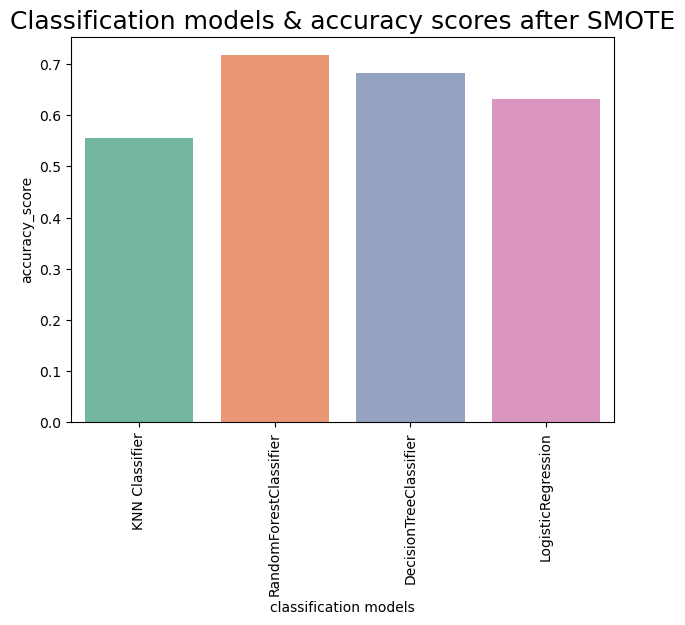

In [37]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title('Classification models & accuracy scores after SMOTE',fontsize=18)
sns.barplot(x="classification models", y="accuracy_score", data=Liverpatient_pred,palette="Set2")

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [39]:
model.feature_importances_

array([0.12138682, 0.02565432, 0.10856961, 0.10046717, 0.11986522,
       0.11898694, 0.12413015, 0.08947691, 0.09888202, 0.09258083])

In [40]:
dd=pd.DataFrame(model.feature_importances_,index=X.columns).sort_values(0,ascending=False)
dd

,0
Aspartate_Aminotransferase,0.124130
Age,0.121387
Alkaline_Phosphotase,0.119865
Alamine_Aminotransferase,0.118987
Total_Bilirubin,0.108570
Direct_Bilirubin,0.100467
Albumin,0.098882
Albumin_and_Globulin_Ratio,0.092581
Total_Protiens,0.089477
Gender,0.025654


Text(0.5, 1.0, 'FEATURE IMPORTANCE')

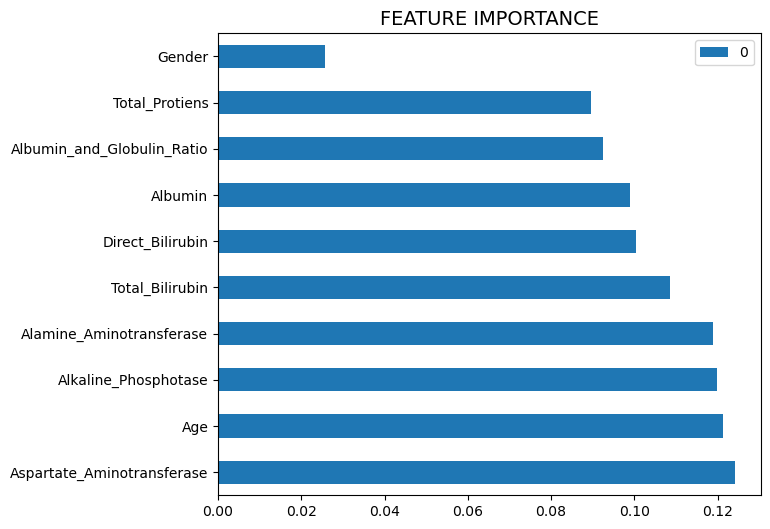

In [41]:
dd.plot(kind='barh',figsize=(7,6))
plt.title("FEATURE IMPORTANCE",fontsize=14)

# Model Deployment

## save the best model

In [42]:
import joblib
joblib.dump(model1,'ETC.pk1')

['ETC.pk1']